<h2>Importing required modules</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Success')

Success


<h3>Import dataset downloaded in local</h3>

In [2]:
url = 'D:\#Portfolio\da-python-project\idmb-dataset-eda\imdb_top_2000_movies.csv'
df = pd.read_csv(url)
print('Success')

Success


In [3]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [4]:
df.tail()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M
1999,Quarantine,2008,89,6.0,53.0,"77,075","Horror, Sci-Fi, Thriller",John Erick Dowdle,Jennifer Carpenter,$31.69M


In [5]:
df.shape

(2000, 10)

In [6]:
df.columns

Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Genre', 'Director', 'Cast', 'Gross'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [8]:
df.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


In [9]:
df.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [10]:
df.duplicated().sum()

0

<h3>Data Pre-processing</h3>

In [11]:
# make duplicate dataframe, so we will not change the main data
df_cleaned = df.copy()

In [12]:
# cast columns name to lower and remove space
print(f'columns name before: {df_cleaned.columns}')
df_cleaned.rename(columns=lambda x: x .lower().strip().replace(' ', '_'), inplace=True)
print(f'\ncolumns name after: {df_cleaned.columns}')

columns name before: Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Genre', 'Director', 'Cast', 'Gross'],
      dtype='object')

columns name after: Index(['movie_name', 'release_year', 'duration', 'imdb_rating', 'metascore',
       'votes', 'genre', 'director', 'cast', 'gross'],
      dtype='object')


In [13]:
# drop null values 
print(f'rows before cleaned: {len(df_cleaned)}\n')
df_cleaned.dropna(inplace=True)
df_cleaned.isnull().sum()
print(f'\nrows after cleaned: {len(df_cleaned)}')

rows before cleaned: 2000


rows after cleaned: 1870


In [14]:
print(df_cleaned.head(),'\n')
print(df_cleaned.dtypes)

                           movie_name release_year  duration  imdb_rating  \
0                       The Godfather         1972       175          9.2   
1               The Godfather Part II         1974       202          9.0   
2                     Ordinary People         1980       124          7.7   
3                  Lawrence of Arabia         1962       218          8.3   
5  Close Encounters of the Third Kind         1977       138          7.6   

   metascore      votes                        genre              director  \
0      100.0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1       90.0  1,358,608                 Crime, Drama  Francis Ford Coppola   
2       86.0     56,476                        Drama        Robert Redford   
3      100.0    313,044  Adventure, Biography, Drama            David Lean   
5       90.0    216,050                Drama, Sci-Fi      Steven Spielberg   

                cast     gross  
0      Marlon Brando  $134.97M  
1 

In [18]:
# from the information above, gross and vote have to convert into float
def to_numeric(x):
    valid_format = "0123456789."
    x = "".join(["" if i not in valid_format else i for i in x])
    return float(x) if x else None

df_cleaned['gross'] = df_cleaned['gross'].apply(to_numeric)
df_cleaned['votes'] = df_cleaned['votes'].apply(to_numeric)
df_cleaned['release_year'] = df_cleaned['release_year'].apply(to_numeric)


In [19]:
df_cleaned['release_year'] = df_cleaned['release_year'].astype('int64')

In [20]:
df_cleaned['release_year']

0       1972
1       1974
2       1980
3       1962
5       1977
        ... 
1995    2009
1996    2010
1997    2009
1998    2009
1999    2008
Name: release_year, Length: 1870, dtype: int64

In [21]:
# re-checking
print(df_cleaned.head(),'\n')
print(df_cleaned.dtypes)

                           movie_name  release_year  duration  imdb_rating  \
0                       The Godfather          1972       175          9.2   
1               The Godfather Part II          1974       202          9.0   
2                     Ordinary People          1980       124          7.7   
3                  Lawrence of Arabia          1962       218          8.3   
5  Close Encounters of the Third Kind          1977       138          7.6   

   metascore      votes                        genre              director  \
0      100.0  2002655.0                 Crime, Drama  Francis Ford Coppola   
1       90.0  1358608.0                 Crime, Drama  Francis Ford Coppola   
2       86.0    56476.0                        Drama        Robert Redford   
3      100.0   313044.0  Adventure, Biography, Drama            David Lean   
5       90.0   216050.0                Drama, Sci-Fi      Steven Spielberg   

                cast   gross  
0      Marlon Brando  134.97  


release_year       Axes(0.125,0.653529;0.227941x0.226471)
duration        Axes(0.398529,0.653529;0.227941x0.226471)
imdb_rating     Axes(0.672059,0.653529;0.227941x0.226471)
metascore          Axes(0.125,0.381765;0.227941x0.226471)
votes           Axes(0.398529,0.381765;0.227941x0.226471)
gross           Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

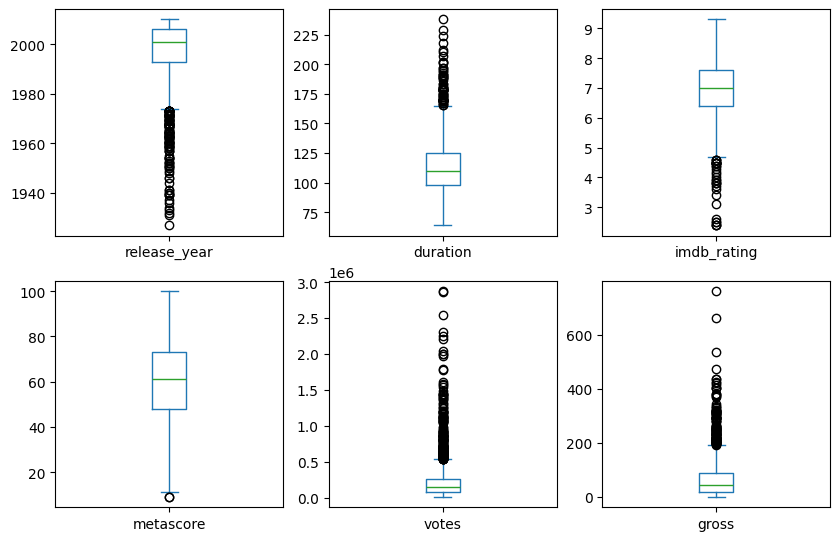

In [22]:
# checking whether there is an outlier
df_cleaned.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))

In [23]:
print(f'rows before removing outliers: {len(df_cleaned)}')

for col in ['duration','imdb_rating', 'metascore', 'votes', 'gross']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    df_cleanes = df_cleaned[(df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)]

print(f'rows after removing outliers: {len(df_cleanes)}')

rows before removing outliers: 1870
rows after removing outliers: 1759


In [24]:
# serapate nmerical and cateorical columns and breakdown

cat_col = df_cleaned.select_dtypes(include=['object']).columns
num_col = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

cat_summary = df_cleaned[cat_col].describe()
num_summary = df_cleaned[num_col].describe()

print(cat_summary,'\n') 
print(num_summary)

        movie_name                   genre          director        cast
count         1870                    1870              1870        1870
unique        1854                     258               852         843
top     Robin Hood  Comedy, Drama, Romance  Steven Spielberg  Tom Cruise
freq             2                      92                22          23 

       release_year     duration  imdb_rating    metascore         votes  \
count   1870.000000  1870.000000  1870.000000  1870.000000  1.870000e+03   
mean    1997.068984   114.021925     6.917701    60.604813  2.324929e+05   
std       13.092585    22.111954     0.910489    17.811494  2.832883e+05   
min     1927.000000    64.000000     2.400000     9.000000  7.442000e+03   
25%     1993.000000    98.000000     6.400000    48.000000  8.340525e+04   
50%     2001.000000   110.000000     7.000000    61.000000  1.409245e+05   
75%     2006.000000   125.000000     7.600000    73.000000  2.624302e+05   
max     2010.000000   238

In [ ]:
cat_col_cleanes = df_cleanes.select_dtypes(include=['object']).columns
num_col_cleanes = df_cleanes.select_dtypes(include=['int64', 'float64']).columns

cat_summary_cleanes = df_cleanes[cat_col_cleanes].describe()
num_summary_cleanes = df_cleanes[num_col_cleanes].describe()

print(cat_summary_cleanes,'\n') 
print(num_summary_cleanes)

In [29]:
df_cleaned['genre'].value_counts()

genre
Comedy, Drama, Romance          92
Comedy                          60
Animation, Adventure, Comedy    58
Comedy, Romance                 55
Drama, Romance                  54
                                ..
Action, Family, Sport            1
Comedy, Family, Sci-Fi           1
Comedy, Drama, History           1
Drama, History, War              1
Action, Drama, Fantasy           1
Name: count, Length: 258, dtype: int64

<h3>EDA</h3>

In [27]:
def top5(column_y, column_x, df=df_cleaned):
    dataframe = df_cleaned.sort_values(by=column_x, ascending=False, ignore_index=True)[[column_y, column_x]].head()
    plt.figure(figsize=(8,3))
    sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')
    plt.title(f'Top 5 {column_y} by {column_x}')
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


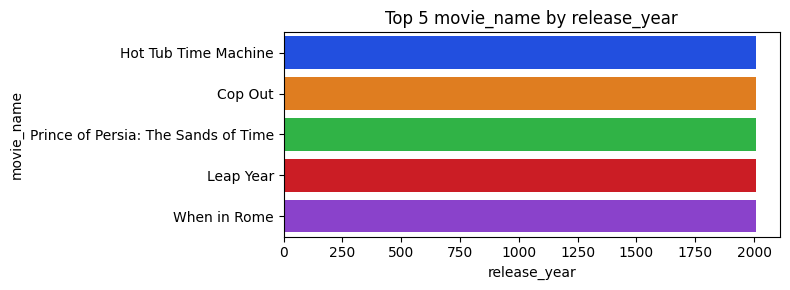

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


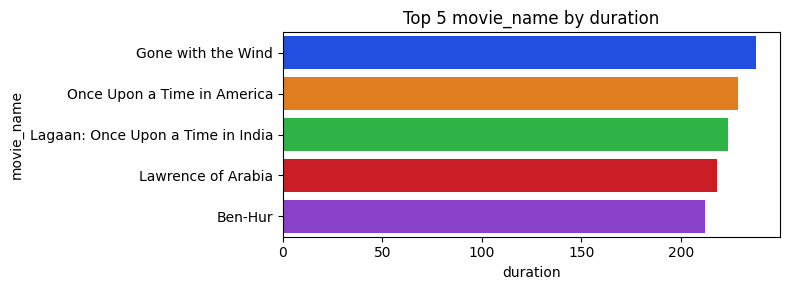

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


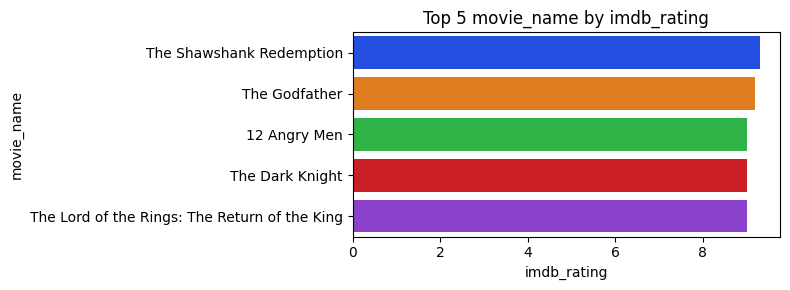

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


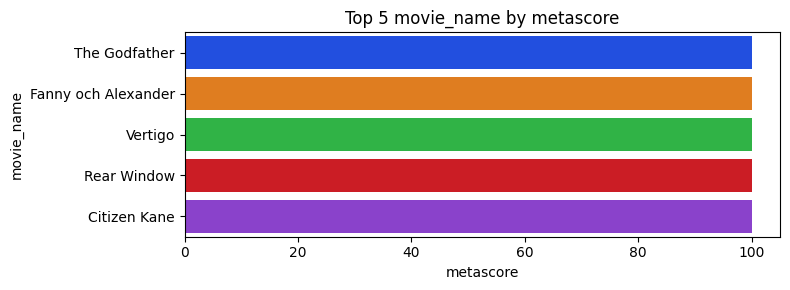

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


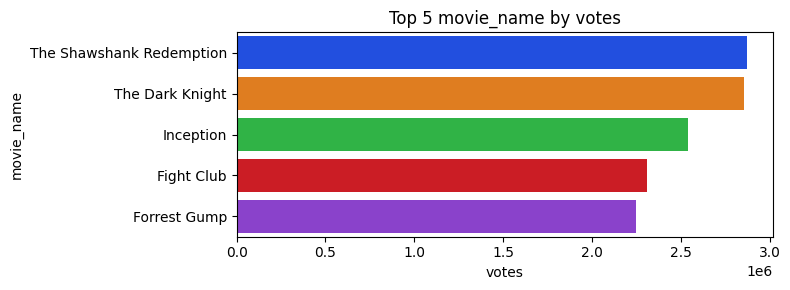

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


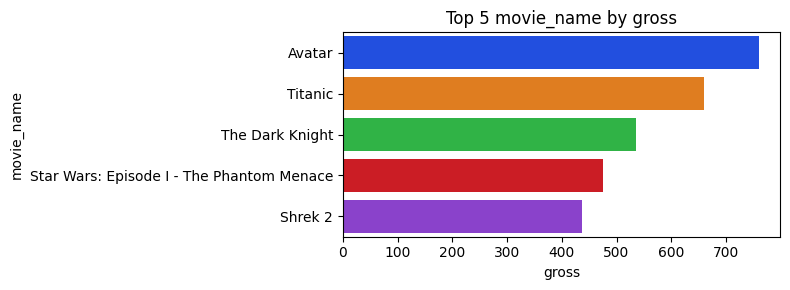

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


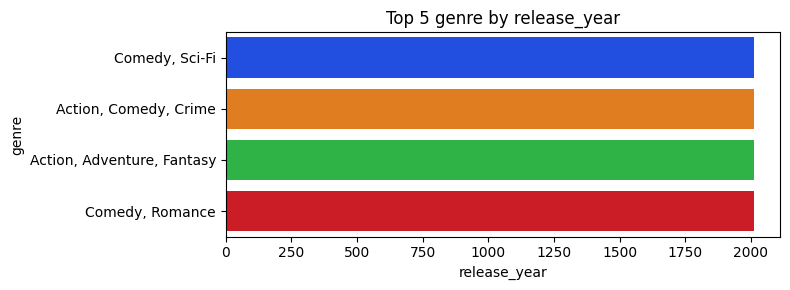

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


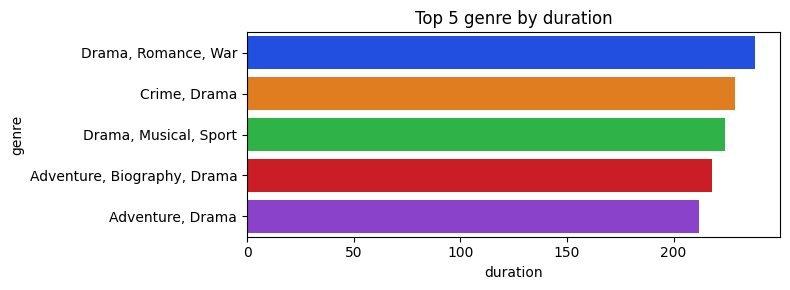

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


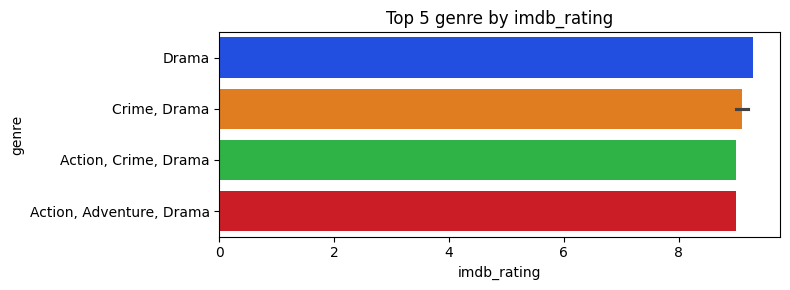

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


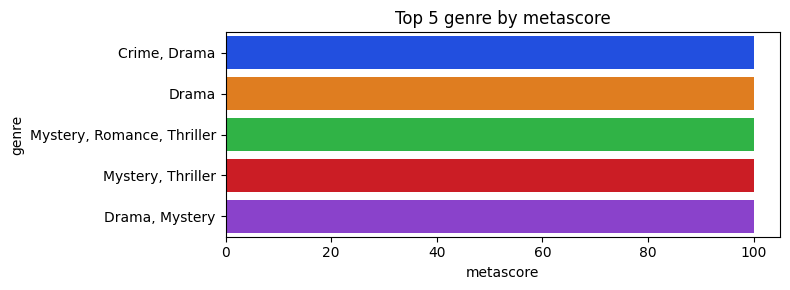

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


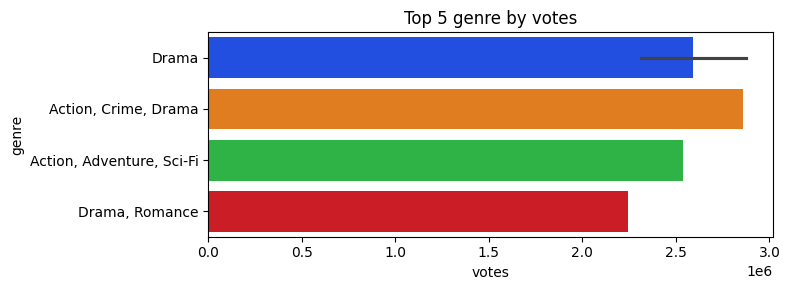

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


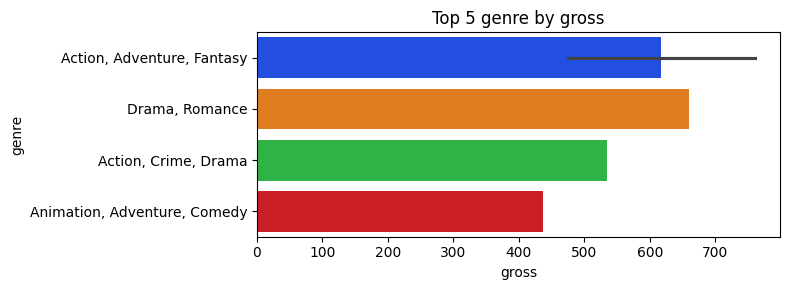

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


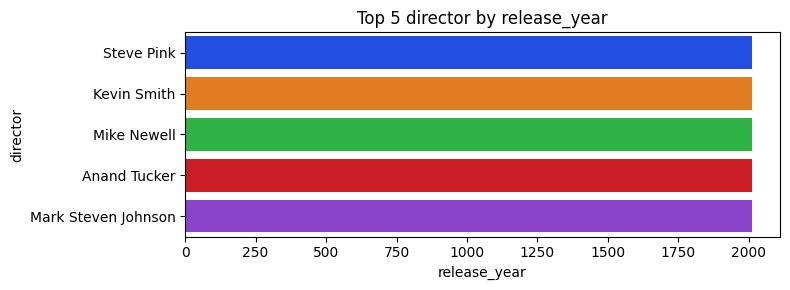

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


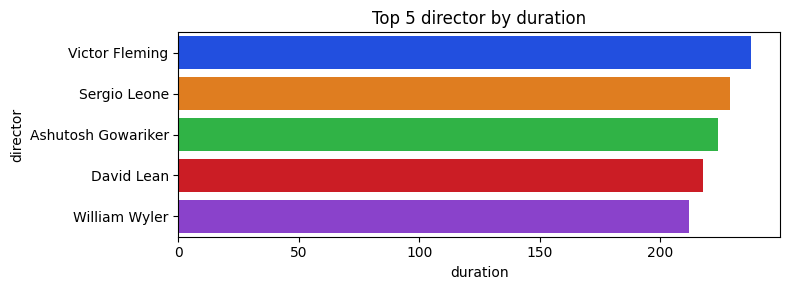

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


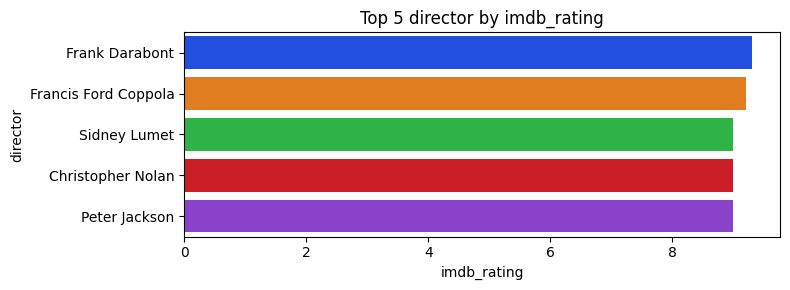

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


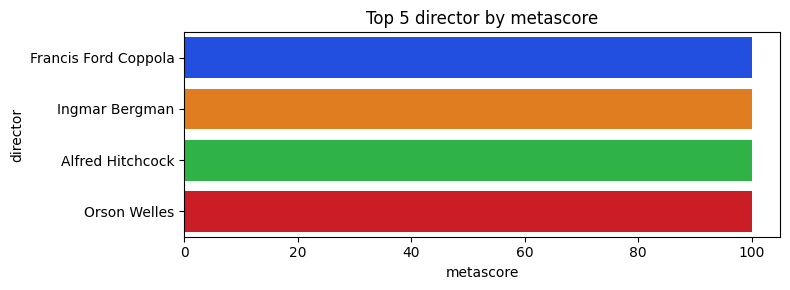

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


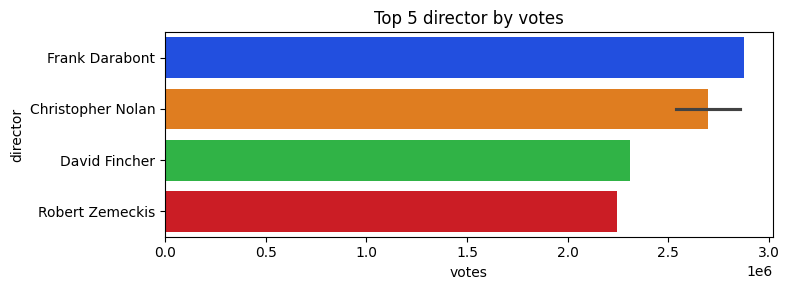

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


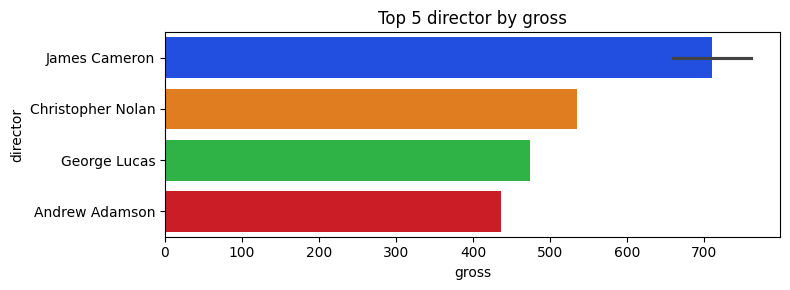

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


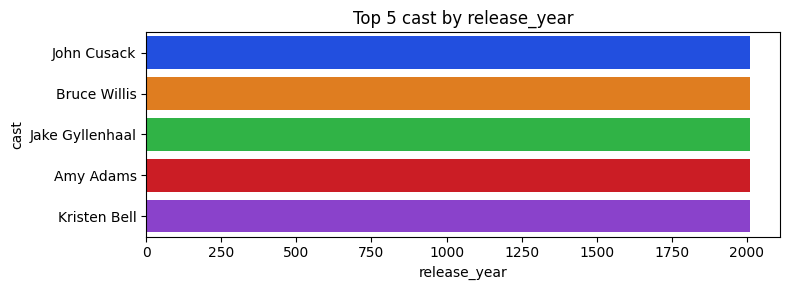

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


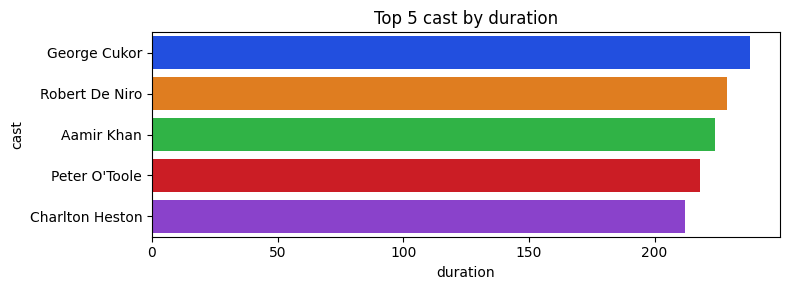

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


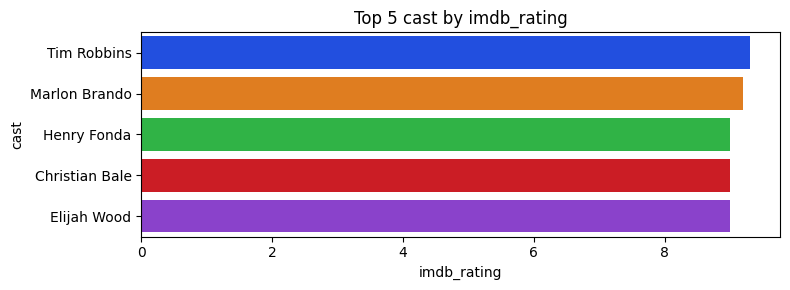

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


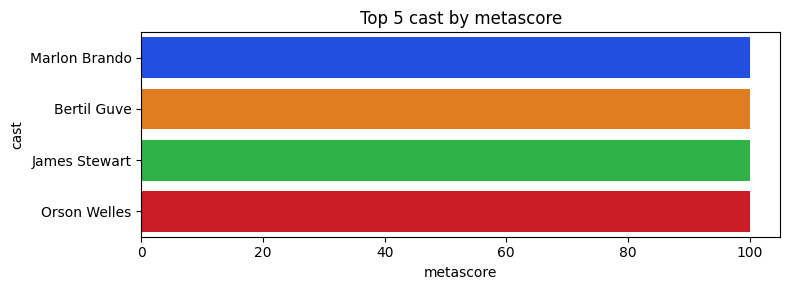

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


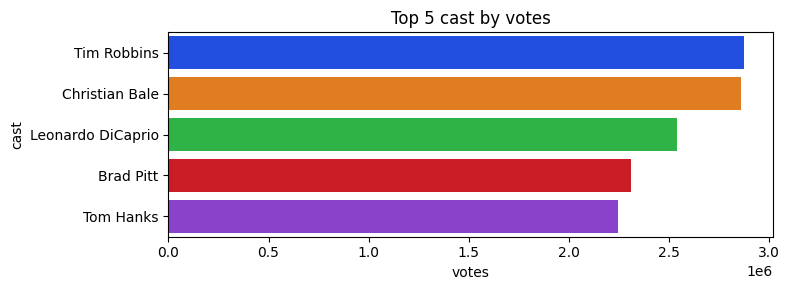

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


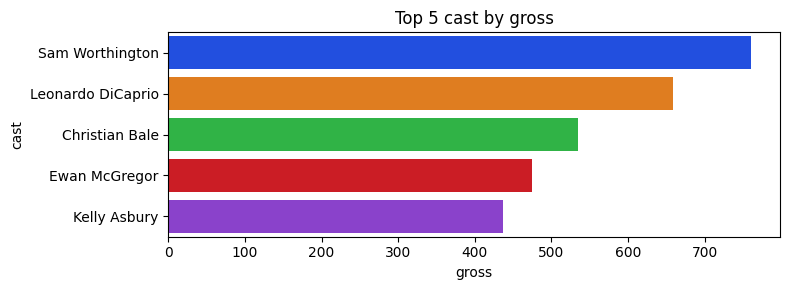

In [28]:
for col_y in df_cleaned[cat_col]:
    for col_x in df_cleaned[num_col]:
        top5(col_y, col_x)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


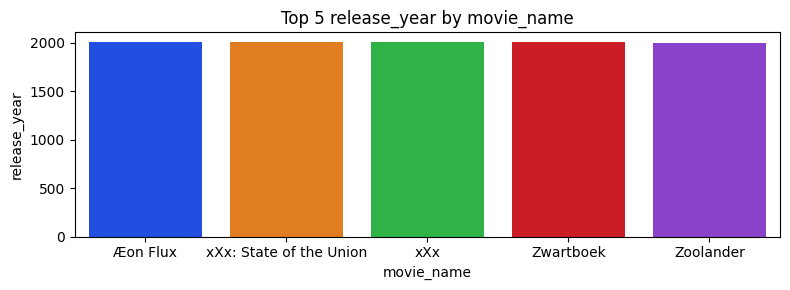

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


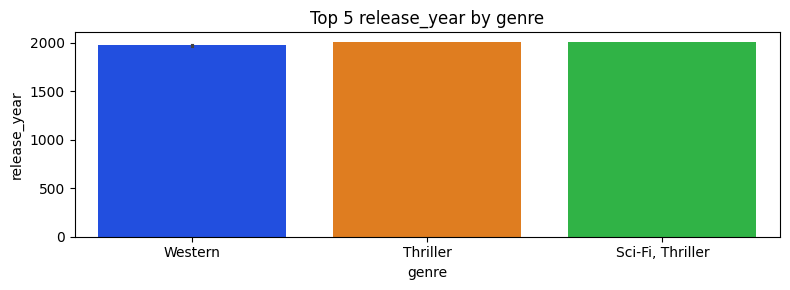

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


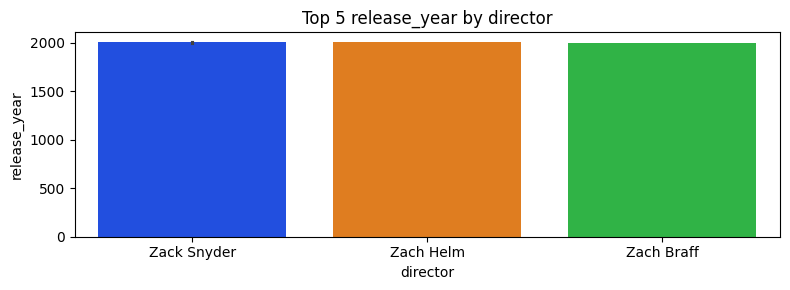

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


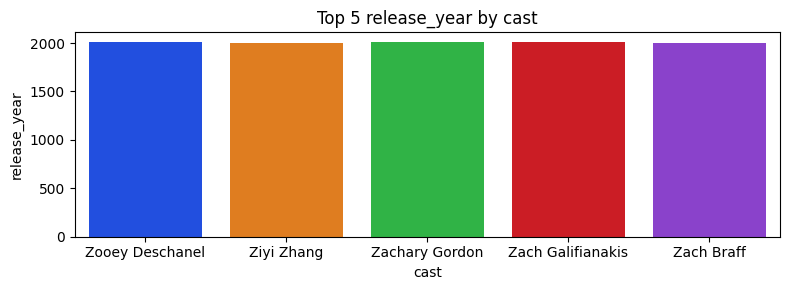

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


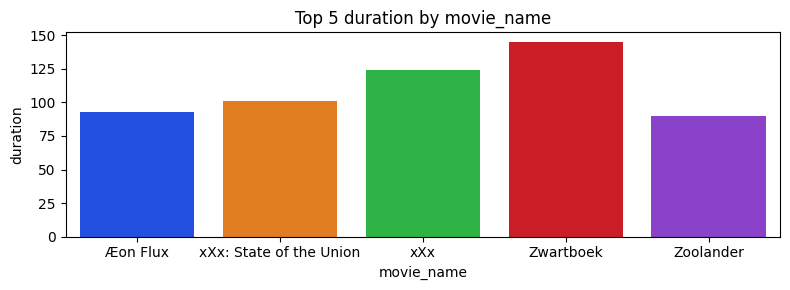

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


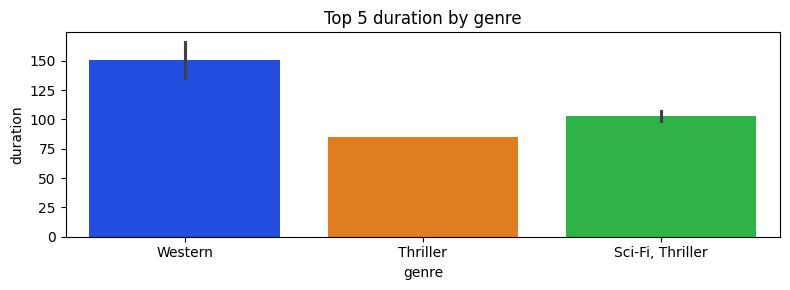

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


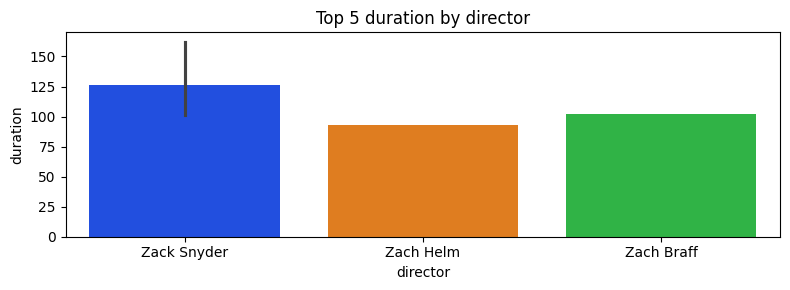

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


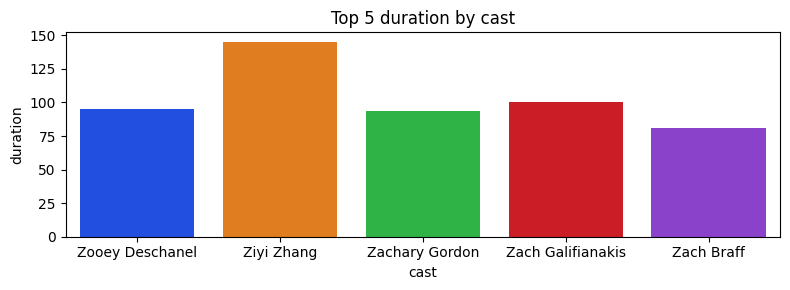

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


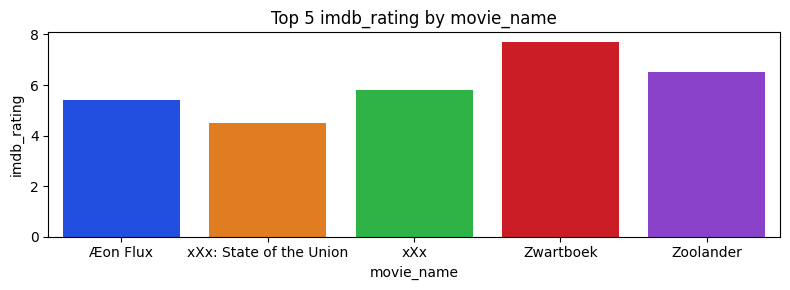

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


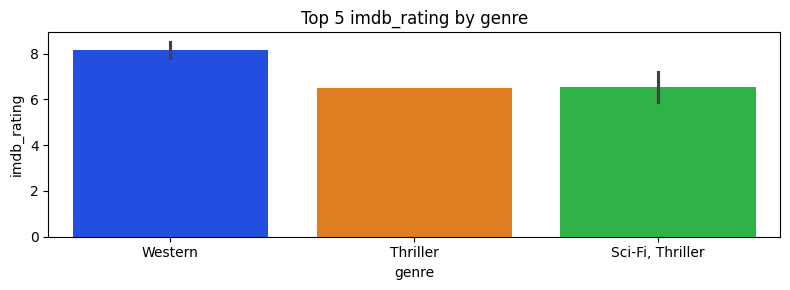

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


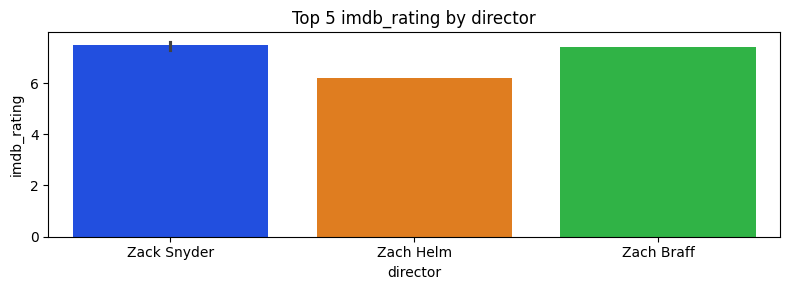

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


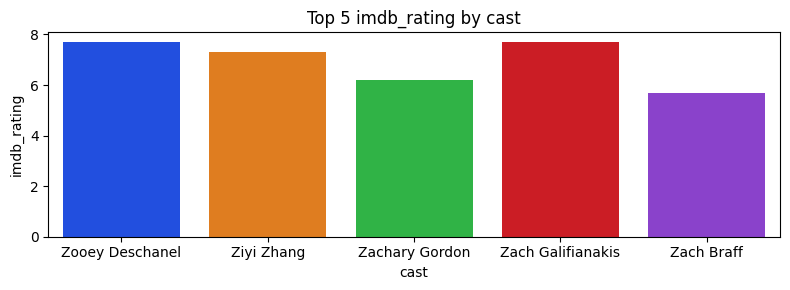

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


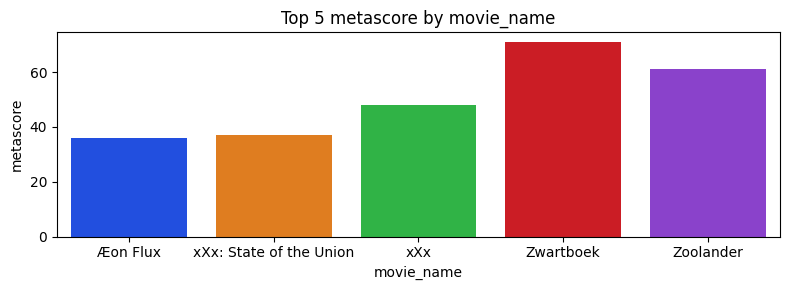

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


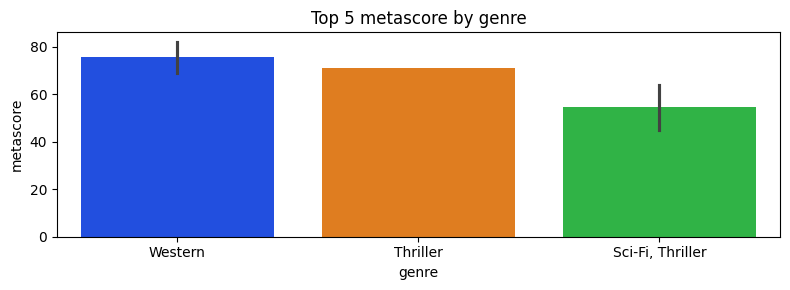

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


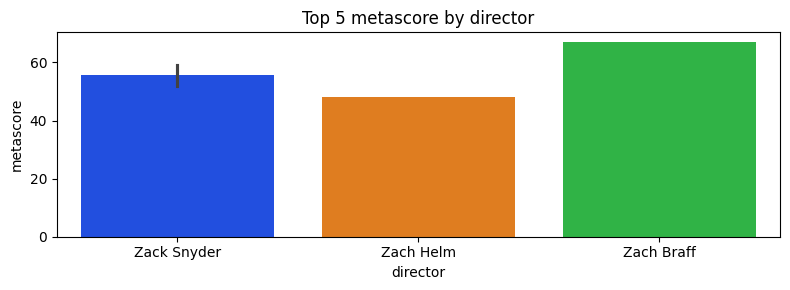

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


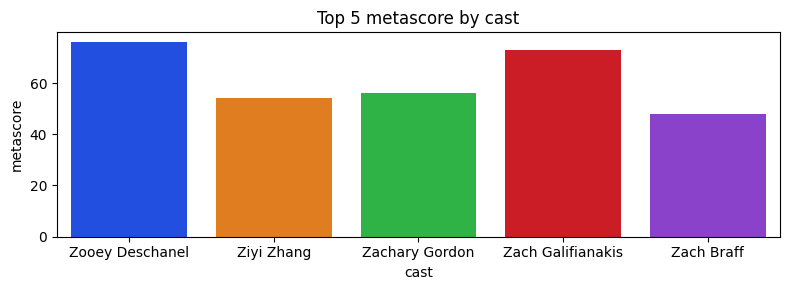

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


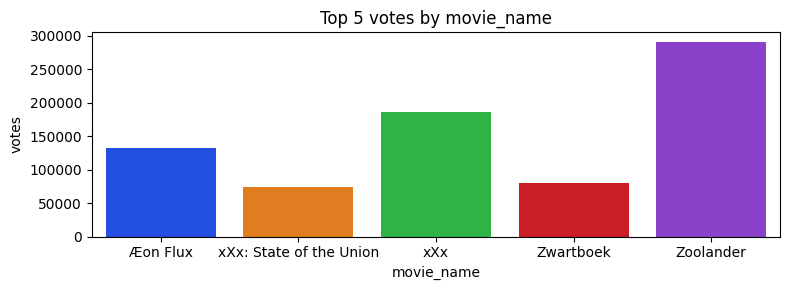

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


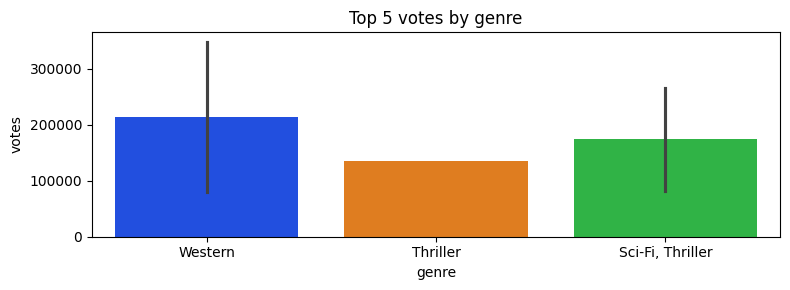

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


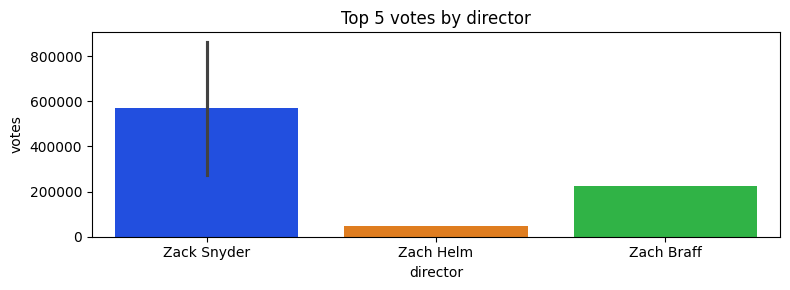

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


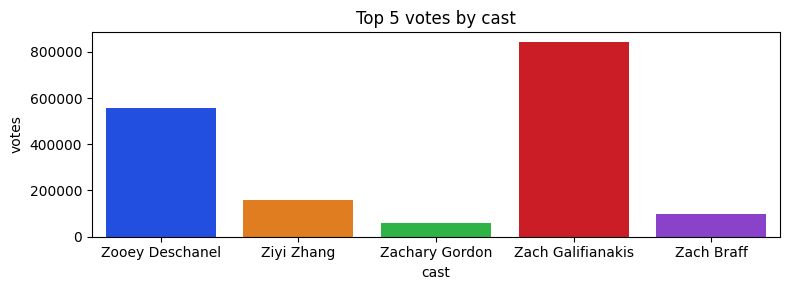

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


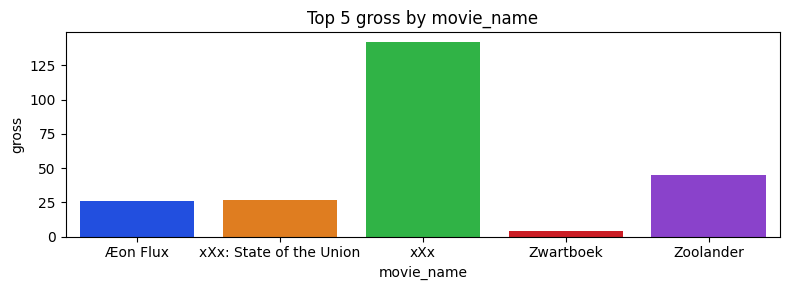

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


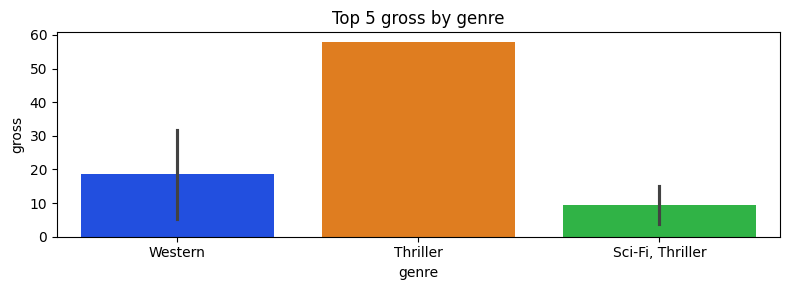

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


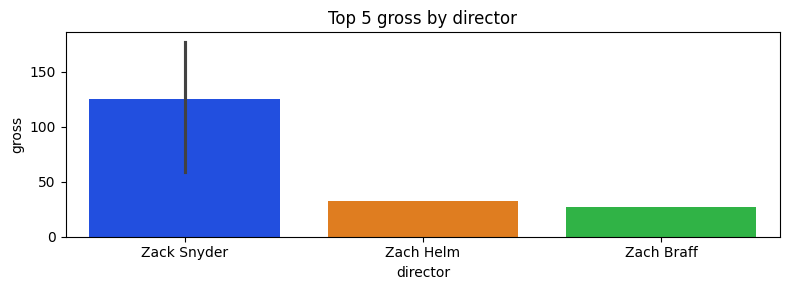

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13136\3285437009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataframe, x=column_x, y=column_y,palette='bright')


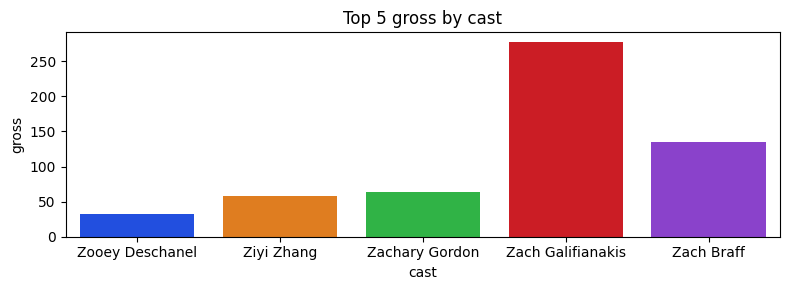

In [30]:
for col_y in df_cleaned[num_col]:
    for col_x in df_cleaned[cat_col]:
        top5(col_y, col_x)